In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import zipfile
import kaggle

# Importing data

In [5]:
!kaggle datasets download -d ccanb23/iea-monthly-electricity-statistics
zipfile_name = 'iea-monthly-electricity-statistics.zip'
with zipfile.ZipFile(zipfile_name,'r') as file:
    file.extractall()

df = pd.read_csv('data.csv')

sns.set_style('darkgrid')

iea-monthly-electricity-statistics.zip: Skipping, found more recently modified local copy (use --force to force download)


# OECD Europe Analysis

In [6]:
df.drop(['CODE_TIME', 'TIME', 'DISPLAY_ORDER', 'yearToDate', 'previousYearToDate', 'share'], axis=1, inplace=True)
df['DATETIME'] = pd.to_datetime(df[['YEAR', 'MONTH']].assign(day=1))
df_OECD = df.loc[(df.COUNTRY == 'OECD Europe')]

Text(0.5, 0, 'Time')

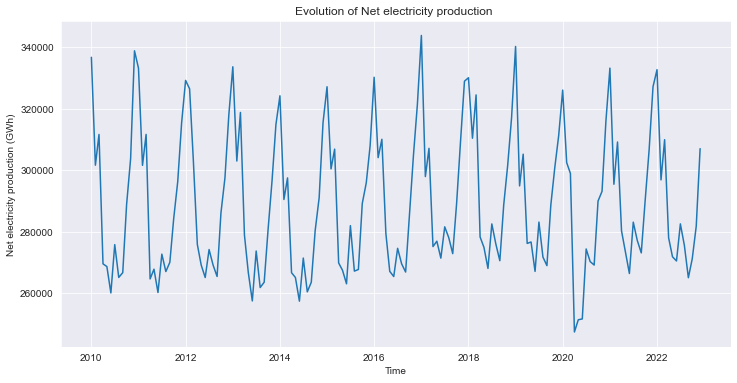

In [7]:
data_net = df_OECD.loc[(df.PRODUCT=='Net electricity production')]
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=data_net, x='DATETIME', y='VALUE')
ax.set_title('Evolution of Net electricity production ')
ax.set_ylabel('Net electricity production (GWh)')
ax.set_xlabel('Time')

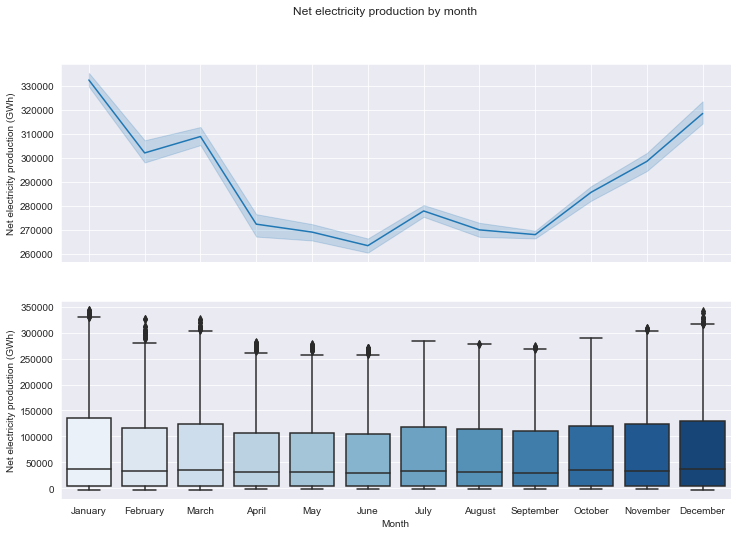

In [8]:
fig, ax = plt.subplots(2,1,figsize=(12, 8), sharex=True)
fig.suptitle('Net electricity production by month')
sns.lineplot(ax=ax[0], data=data_net, x='MONTH_NAME', y='VALUE')
ax[0].set_ylabel('Net electricity production (GWh)')

sns.boxplot(ax=ax[1], data=df_OECD, x='MONTH_NAME', y='VALUE', palette='Blues')
ax[1].set_ylabel('Net electricity production (GWh)')
ax[1].set_xlabel('Month')
plt.show()

Text(0.5, 1.0, 'Energetic Matrix - OECD Europe')

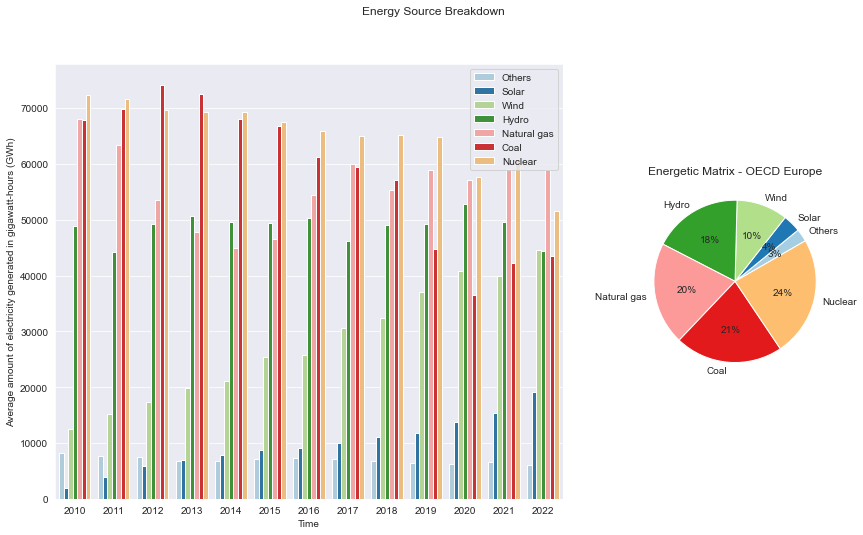

In [9]:
type_pro = ['Hydro', 'Wind', 'Solar', 'Nuclear', 'Coal', 'Natural gas','Others']
df_type_pro = df_OECD[df_OECD.PRODUCT.apply(lambda x: x in type_pro)]
matrix = df_type_pro.groupby('PRODUCT').mean()['VALUE'].sort_values()
labels = matrix.index

fig, ax = plt.subplots(1,2,figsize=(14, 8),gridspec_kw={'width_ratios': [2.5,1]})
fig.suptitle('Energy Source Breakdown')
sns.barplot(ax=ax[0],data=df_type_pro, x='YEAR', y='VALUE',hue='PRODUCT', estimator='mean', errorbar=None, hue_order= matrix.index, palette='Paired')
ax[0].legend(loc='upper right')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Average amount of electricity generated in gigawatt-hours (GWh)')

ax[1].pie(x=matrix, labels=labels, autopct='%.0f%%', rotatelabels=False, startangle=30, colors=sns.color_palette("Paired"));
ax[1].set_title('Energetic Matrix - OECD Europe')

Text(0.5, 0, 'Time')

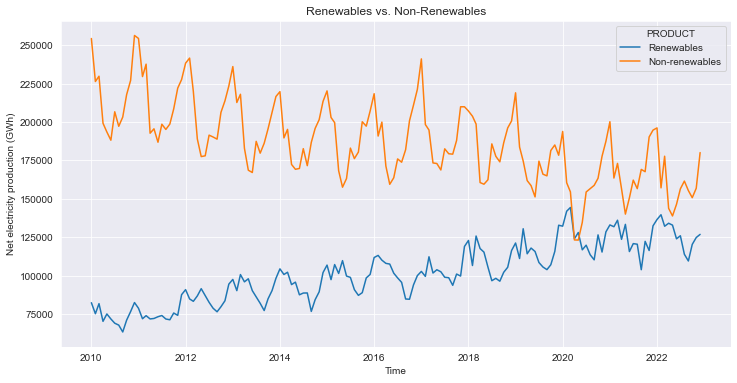

In [10]:
data_rnr = df_OECD.loc[df.PRODUCT.apply(lambda x :x in ['Renewables', 'Non-renewables'])]
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=data_rnr, x='DATETIME', y='VALUE',hue='PRODUCT')
ax.set_title('Renewables vs. Non-Renewables')
ax.set_ylabel('Net electricity production (GWh)')
ax.set_xlabel('Time')

# Top10 OECD Europe Analysis

In [11]:
c_euro = ['Austria', 'Belgium','Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France',
       'Germany', 'Greece', 'Hungary','Iceland', 'Ireland',
       'Italy','Netherlands','Norway','Poland',
       'Portugal', 'Republic of Turkiye', 'Slovak Republic', 'Slovenia',
       'Spain', 'Sweden', 'Switzerland','United Kingdom','Bulgaria', 'Croatia', 'Romania']
df_c_euro = df.loc[(df.COUNTRY.apply(lambda x: x in c_euro))]
top10 = df_c_euro.groupby('COUNTRY').sum()['VALUE'].sort_values(ascending=False).head(10)
df_c_euro10 = df.loc[(df.COUNTRY.apply(lambda x: x in list(top10.index)))]

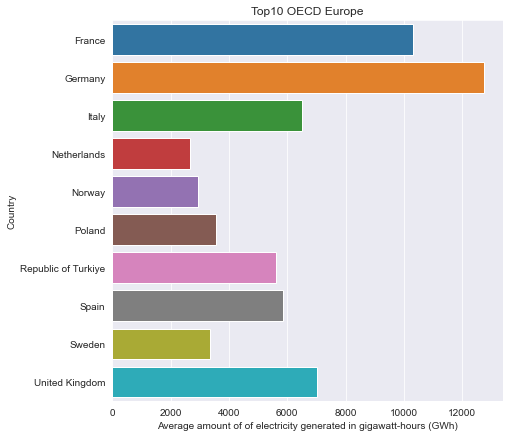

In [12]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.barplot(data=df_c_euro10, x='VALUE', y='COUNTRY', ax=ax, estimator=np.mean, errorbar=('ci', 0))
ax.set_title('Top10 OECD Europe')
ax.set_xlabel('Average amount of of electricity generated in gigawatt-hours (GWh)')
ax.set_ylabel('Country')
plt.show()

## Renewable Ratio
## $$\text{Renewable Ratio} = \dfrac{\text{Renewable}}{\text{Renewable}+\text{Non-Renewable}}\cdot100$$

Text(0.5, 0, 'Time')

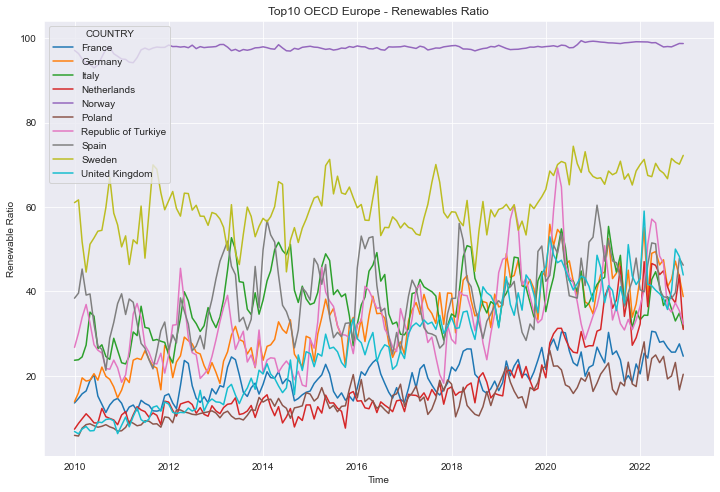

In [13]:
df_c_euro10_rnr = df_c_euro10.loc[df_c_euro10.PRODUCT.apply(lambda x: x in ['Renewables','Non-renewables'])]
rnr_ratio = df_c_euro10_rnr.VALUE[0::2].values/(df_c_euro10_rnr.VALUE[0::2].values+df_c_euro10_rnr.VALUE[1::2].values)*100

rnr = df_c_euro10.loc[df_c_euro10.PRODUCT.apply(lambda x: x in 'Renewables')]
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(data=rnr, x='DATETIME', y=rnr_ratio ,hue="COUNTRY")
ax.set_title('Top10 OECD Europe - Renewables Ratio')
ax.set_ylabel('Renewable Ratio')
ax.set_xlabel('Time')